In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [133]:
mcdonalds = pd.read_csv("mcdonalds.csv")
list(mcdonalds.columns)


['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [134]:
mcdonalds.shape

(1453, 15)

In [135]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [136]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [137]:
MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes") + 0
col_means = np.mean(MD_x, axis=0)
col_means_rounded = np.round(col_means, 2)
col_means_rounded

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [138]:
pca = PCA()
MD_pca = pca.fit(MD_x)

standard_deviation = np.sqrt(MD_pca.explained_variance_)
proportion_of_variance = MD_pca.explained_variance_ratio_
cumulative_proportion = np.round(np.cumsum(proportion_of_variance), 5)

print("standard_deviation:", standard_deviation)
print("proportion_of_variance", proportion_of_variance)
print("cumulative proportion", cumulative_proportion)

standard_deviation: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
proportion_of_variance [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
cumulative proportion [0.29945 0.49224 0.62529 0.70839 0.76787 0.81817 0.86201 0.90156 0.93832
 0.97068 1.     ]


In [139]:
(MD_pca.components_, 1)

(array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
         -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
          0.37475293],
        [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
         -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
         -0.13965633],
        [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
         -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
         -0.08857138],
        [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
         -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
          0.36953871],
        [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
          0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
         -0.72920859],
        [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
         -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.1782261

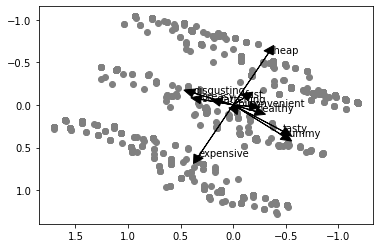

In [140]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == 'Yes') + 0

# perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# plot the results
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')

# add arrows to the plot
labels = MD_x.columns
for i, label in enumerate(labels):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.annotate(label, xy=(pca.components_[0, i], pca.components_[1, i]))

# invert the y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# show the plot
plt.show()

In [141]:
from sklearn.cluster import KMeans

np.random.seed(1234)
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(MD_pca)
    results[n_clusters] = kmeans.labels_

# Choose the best cluster results based on the silhouette score or another metric
best_n_clusters = 2  # example
cluster_labels = results[best_n_clusters]

In [142]:
X = StandardScaler().fit_transform(MD_x)

np.random.seed(1234)
inertias = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

best_k = np.argmin(inertias) + 2
MD_km28 = KMeans(n_clusters=best_k, n_init=10).fit(X)

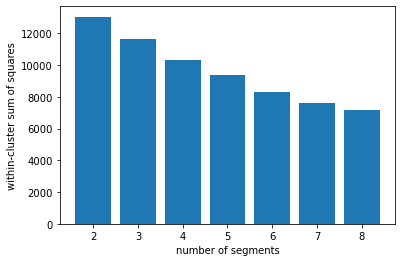

In [143]:
inertias = [KMeans(n_clusters=k, n_init=10).fit(X).inertia_ for k in range(2, 9)]
plt.bar(range(2, 9), inertias, align='center')
plt.xlabel('number of segments')
plt.ylabel('within-cluster sum of squares')
plt.show()

In [151]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Calculate the distance matrix
MD_dist = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
MD_vclust = linkage(MD_dist, method='complete')

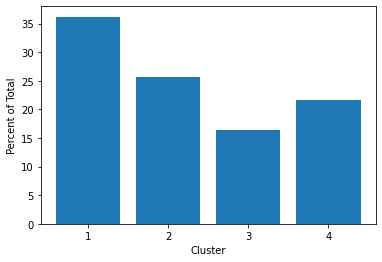

In [152]:
labels = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x)

# Count the number of samples in each cluster
counts = np.bincount(labels)

# Calculate the percentage of samples in each cluster
percentages = counts / len(labels) * 100

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(range(1, 5), percentages)
ax.set_xticks(range(1, 5))
ax.set_xlabel('Cluster')
ax.set_ylabel('Percent of Total')
plt.show()